In [111]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [112]:
data_df = pd.read_csv('titanic.csv')
data_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [113]:
y_data = data_df[['Survived']]
# y_data.head(3)

In [114]:
del data_df['Survived']
x_data = data_df.copy()
#x_data.head(3)

In [115]:
data_df.shape

(891, 11)

In [116]:
type('Age')

str

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [117]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [118]:
# 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [119]:
del x_data['PassengerId']
del x_data['SibSp']
del x_data['Parch']
del x_data['Ticket']
del x_data['Fare']
del x_data['Cabin']
del x_data['Name']

In [120]:
x_data.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [121]:
# Sex
x_data['Sex'] = x_data['Sex'].map({'male' : 0, 'female' : 1})

In [122]:
# Embarked
x_data.Embarked.fillna('S', inplace=True)
x_data['Embarked'] = x_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [123]:
x_data.head()

,Pclass,Sex,Age,Embarked
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,0
3,1,1,35.0,0
4,3,0,35.0,0


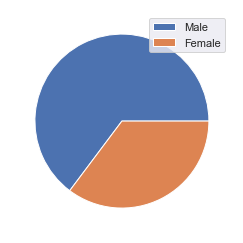

In [132]:
from matplotlib import pyplot as plt
data = x_data['Sex'].value_counts()
categories = ['Male', 'Female']
plt.pie(data)
plt.legend(categories)
plt.show()

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [136]:
train = np.array(data_df)
train_target = np.array(x_data)

In [137]:
train

array([[1, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [2, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [3, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [889, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [890, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [891, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

In [138]:
train_target

array([[ 3.,  0., 22.,  0.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., 28.,  0.],
       [ 1.,  0., 26.,  1.],
       [ 3.,  0., 32.,  2.]])

In [153]:
train_X = train[:, 0:1] 
train_X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [

In [154]:
train_Y = train_target
train_Y

array([[ 3.,  0., 22.,  0.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., 28.,  0.],
       [ 1.,  0., 26.,  1.],
       [ 3.,  0., 32.,  2.]])

In [155]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(train_X, train_Y, test_size=0.3, random_state=0)
# random_state (random_seed or seed) : make the result reproducible

In [156]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 1)
(268, 1)
(623, 4)
(268, 4)


<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>

## 4. Train the model

In [157]:
from sklearn import linear_model

model = linear_model.LinearRegression() # 선형회귀

In [158]:
# Train the model using the training sets

model.fit(x_train, y_train) # 모델에 데이터를 '맞춰줍니다'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
model.predict(x_train)

array([[ 2.24011218,  0.31364977, 30.80087017,  0.31017769],
       [ 2.33272705,  0.3753598 , 28.33374619,  0.39444493],
       [ 2.29430051,  0.34975589, 29.35737278,  0.35948188],
       ...,
       [ 2.26634347,  0.33112789, 30.1021071 ,  0.33404469],
       [ 2.27439694,  0.33649398, 29.88757458,  0.34137227],
       [ 2.26001575,  0.32691168, 30.27066837,  0.3282873 ]])

In [162]:
print('MSE(Training data) : ', np.mean((model.predict(x_train) - y_train) ** 2))

MSE(Training data) :  42.631769623192376


In [163]:
from sklearn.metrics import mean_squared_error

print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))

MSE(Training data) :  42.6317696231924


In [164]:
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data) :  42.69405058580164


In [165]:
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

6.534068455855175

ValueError: x and y must be the same size

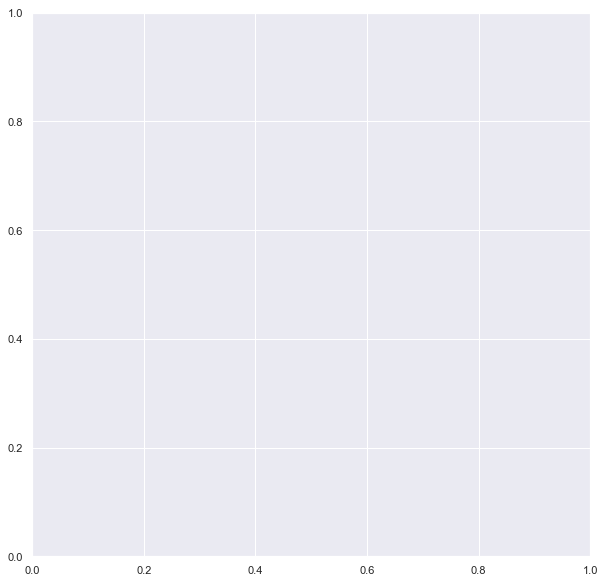

In [166]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)